# Equação de Poisson

In [9]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

# Resolver a 2D

In [10]:
def poisson2d(phi: np.ndarray, solve: np.ndarray, a: float, ff: np.ndarray, eps: float=1e-6, omega: float=0.9) -> np.ndarray:
    """
        Resolve a equação de Poisson a 2D `nabla^2 phi = ff(x, y)` numa grelha de pontos equidistantes de distância a usando o método de Gauss-Seidel com sobrerelaxação começando com estimativa inicial `phi` e terminando quando o passo em cada ponto for menor que `eps`.

        A matriz `solve` contém True caso o ponto esteja na área governada pela equação e contém False caso esteja na fronteira.

        A matriz `ff` contém os valores de func avaliados nos pontos da grelha. 
    """

    # Dimensões do problema
    Nx, Ny = phi.shape

    erro = eps + 1
    while erro > eps:
        erro = 0

        # Iterar sobre todos os pontos
        for i in range(Nx):
            for j in range(Ny):
                # Fazer um passo de Gauss-Seidel
                if solve[i, j]:
                    phinew = (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1] - a**2 * ff[i, j]) / 4
                    step = (1 + omega) * (phinew - phi[i, j])
                    phi[i, j] += step

                    # O erro é o maior passo que demos
                    erro = max(erro, abs(step))
    
    return phi

### Testar

Vamos usar o exemplo 9.2 do livro para testar.

In [11]:
# Constantes
L = 1

# Parâmetros
N = 100

a = L / N

phi = np.zeros((N+1, N+1))
solve = np.full((N + 1, N + 1), True)
rho = np.zeros((N+1, N+1))

# Condições do problema
for i in range(N + 1):
    for j in range(N + 1):
        # Potencial na borda da caixa é 0 (não resolver nas fronteiras também)
        if i in [0, N] or j in [0, N]:
            solve[i, j] = False
        
        # Carga positiva
        elif (20 <= i <= 40 and 60 <= j <= 80):
            rho[i, j] = 1
        
        # Carga negativa
        elif (60 <= i <= 80 and 20 <= j <= 40):
            rho[i, j] = -1

# Usamos epsilon0 = 1
ff = -rho

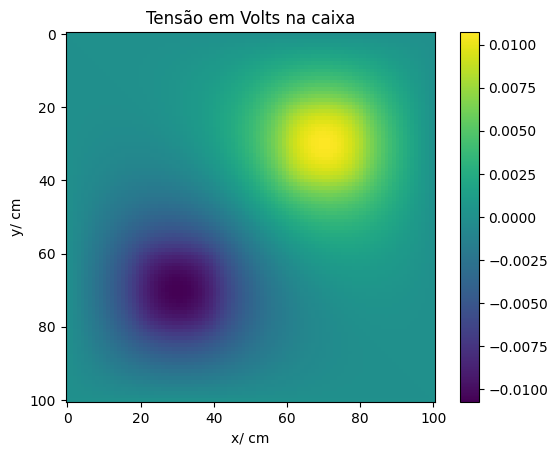

In [12]:
sol = poisson2d(phi, solve, a, ff)

plt.imshow(sol)
plt.colorbar()
plt.title("Tensão em Volts na caixa")
plt.xlabel("x/ cm")
plt.ylabel("y/ cm")
plt.show()